In [1]:
from konlpy.tag import Kkma
kkma = Kkma()


In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요')

['한국어 분석을 시작합니다', '재미있어요']

In [3]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요')

['한국어', '분석']

In [5]:
kkma.pos('한국어 분석을 시작합니다 재미있어요') # 형태소 분석

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN')]

In [6]:
from konlpy.tag import Hannanum

hannanum = Hannanum()

In [7]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요') # 엔진마다 분석이 조금씩 다름

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E')]

In [9]:
# from konlpy.tag import Twitter
# t = Twitter()
# twitter였는데 이름이 Okt로 바뀜

from konlpy.tag import Okt
t = Okt()

In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어요')

['한국어', '분석', '시작']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어요')

['한국어', '분석', '을', '시작', '합니다', '재미있어요']

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어요')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective')]

In [11]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [20]:
import pandas as pd

In [23]:
text = open('./data/06_alice.csv').read()
print(text)

Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without picture

In [24]:
alice_mask = np.array(Image.open('./data/06_alice_mask.png'))
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [26]:
# 딱히 영향을 안주는 단어들
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [27]:
# 앨리스에는 said라는 단어가 많아서 추가시켜줌
stopwords.add('said')

In [12]:
# 한글설정
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')



Text(0.5, 1.0, '헬로우')

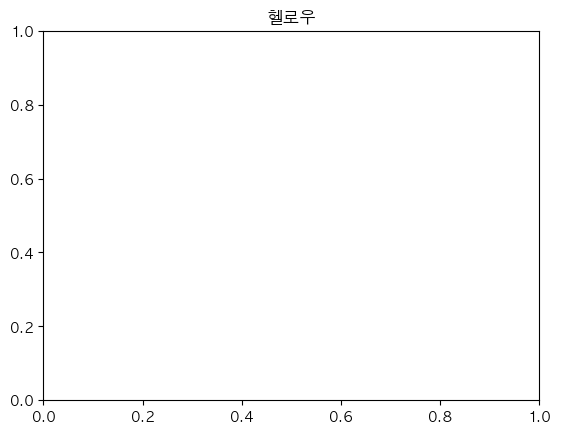

In [32]:
# 설정 잘 됨
plt.title('헬로우')

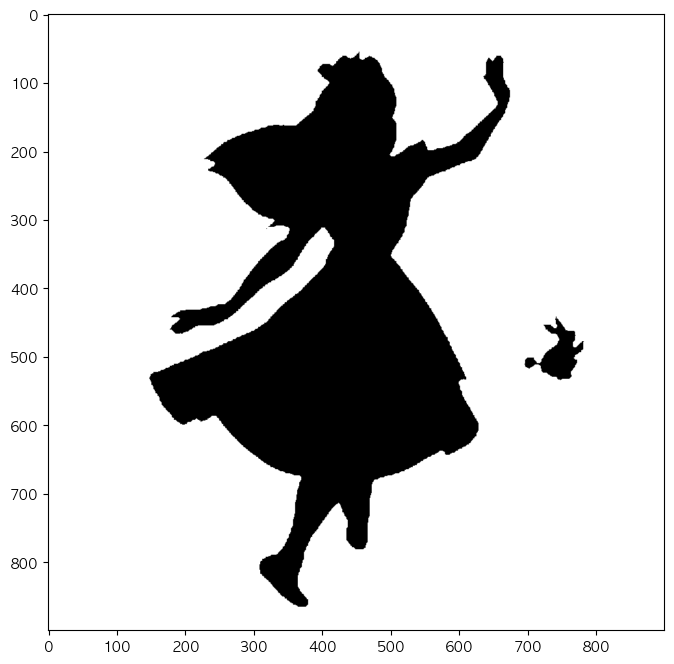

In [34]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear');

In [35]:
wc = WordCloud(
    background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords
)

wc = wc.generate(text)

In [36]:
# 발생빈도
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

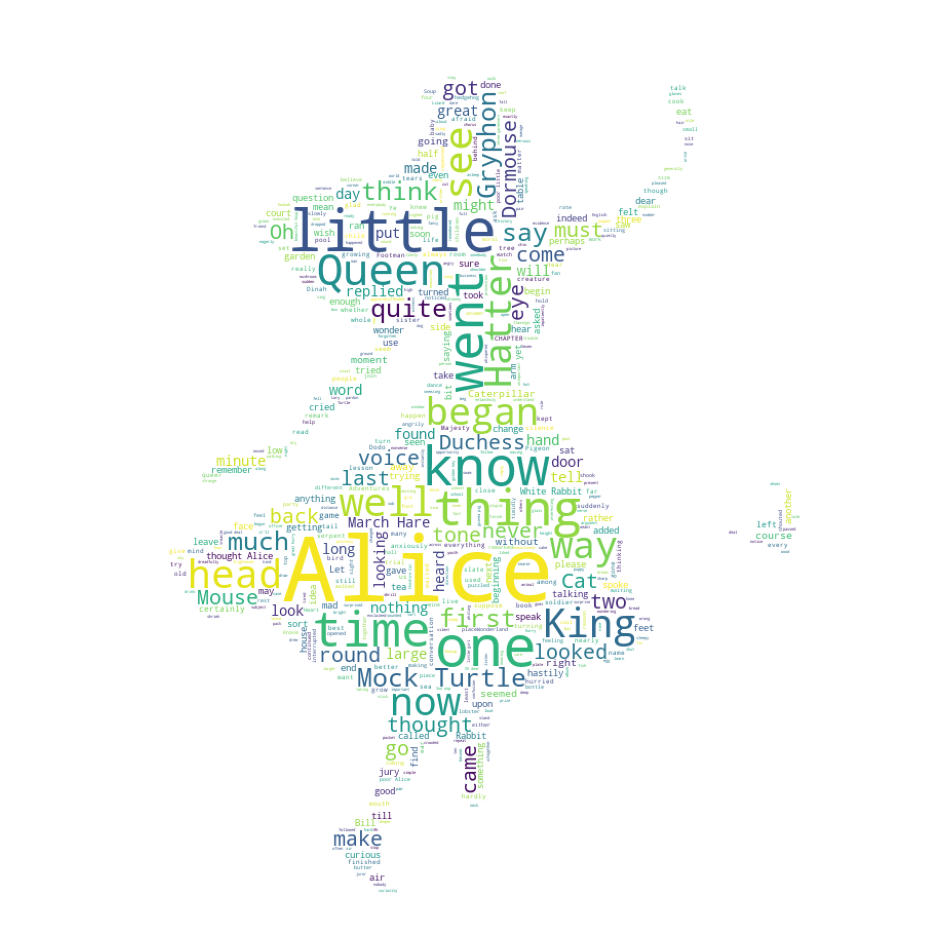

In [39]:
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis('off')
plt.show();

- 스타워즈

In [40]:
text = open('./data/06_a_new_hope.txt').read()
text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('./data/06_stormtrooper_mask.png'))

In [41]:
stopwords.add('int')
stopwords.add('ext')


In [42]:
wc = WordCloud(
    max_words=1000, mask=mask, stopwords=stopwords, margin=10
).generate(text)

In [43]:
default_colors = wc.to_array()

In [44]:
default_colors

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

- 마스크 안에 들어가는 색상이 그레이만 들어가도록 

In [46]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

In [10]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=13))
plt.axis('off')
plt.show();

NameError: name 'plt' is not defined

- konlpy는 대한민국 법령을 가지고 있다

In [1]:
import nltk
from konlpy.corpus import kobill

doc_ko = kobill.open('1809890.txt').read()

In [2]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [3]:
from konlpy.tag import Okt 

t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [4]:
ko = nltk.Text(tokens_ko, name='육야휴직법')
ko

<Text: 육야휴직법>

In [5]:
len(ko.tokens)

735

In [7]:
# 유일한 단어 개수
len(set(ko.tokens))

250

In [8]:
ko.vocab()

FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

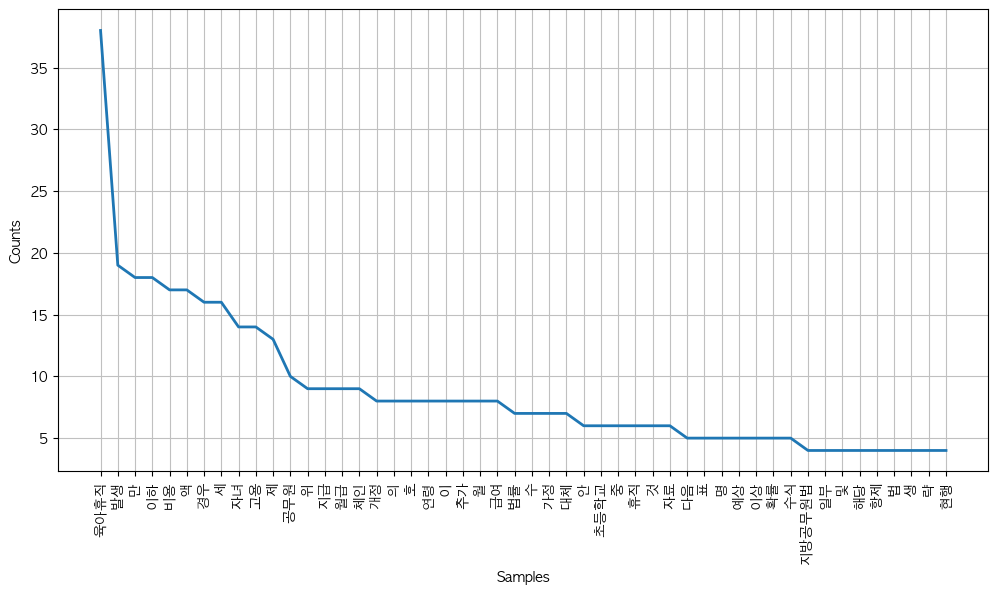

In [13]:
plt.figure(figsize=(12,6))
ko.plot(50) # 가장 많이 발생한 단어 50개만
plt.show();

In [14]:
stop_words = [
    ".",
    "(",
    ")",
    "'",
    "%",
    "-",
    "X",
    ").",
    "x",
    "의",
    "자",
    "에",
    "안",
    "번",
    "호",
    "을",
    "이",
    "다",
    "만",
    "로",
    "가",
    "를"
]

In [15]:
ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

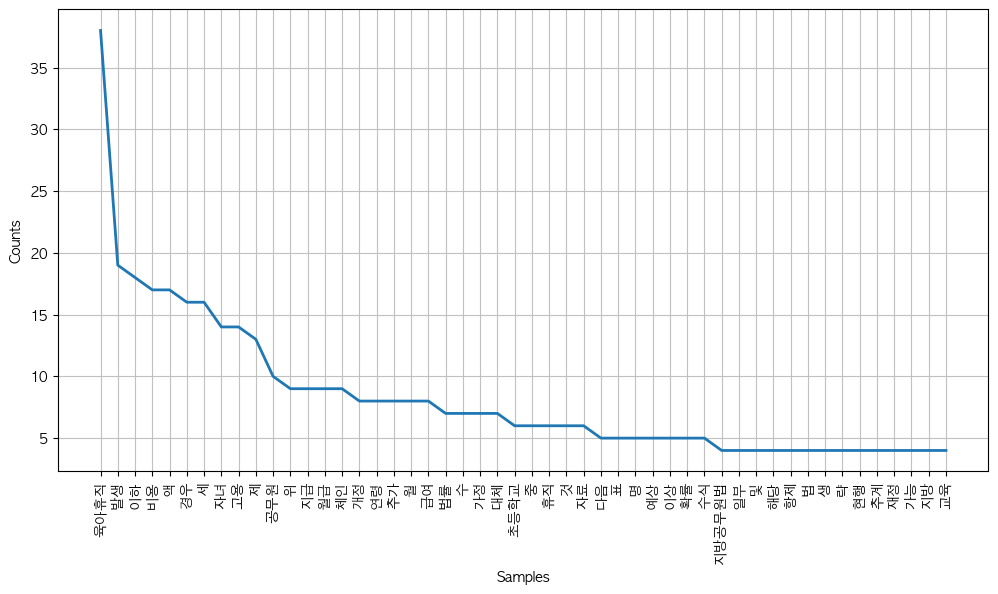

In [16]:
ko = nltk.Text(ko, name='육아휴직법')

plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

- 위의 것과 조금 바뀜

In [17]:
# 특정 단어 빈도수 조사
ko.count('초등학교')

6

- wordcloud

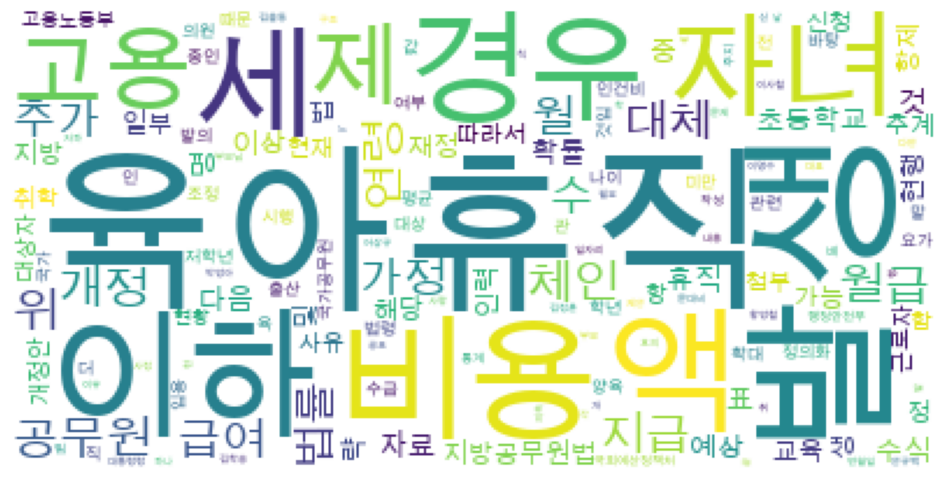

In [18]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(
    font_path='/Library/Fonts/Arial Unicode.ttf',
    relative_scaling=0.2,
    background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

- 나이브베이즈 분류를 이용한 감성분석(영어)

In [19]:
from nltk.tokenize import word_tokenize
import nltk

- 나이브베이즈 분류기는 지도학습이라서 정답을 알려주어야한다

In [20]:
train = [
    ('i like you', 'pos'),
    ('i hate you', 'neg'),
    ('you like me', 'neg'),
    ('i like her', 'pos'),
]

In [22]:
train[0]

('i like you', 'pos')

In [24]:
sentence = train[0]
word_tokenize(sentence[0]) # word_tokenize는 띄어쓰기로 나눠줌

['i', 'like', 'you']

In [28]:
[word.lower() for sentence in train for word in word_tokenize(sentence[0])]

['i',
 'like',
 'you',
 'i',
 'hate',
 'you',
 'you',
 'like',
 'me',
 'i',
 'like',
 'her']

In [30]:
set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [21]:
# 말뭉치 만들기

all_words = set(
    word.lower() for sentence in train for word in word_tokenize(sentence[0])
)
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [31]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'me': False,
   'her': False,
   'i': True,
   'like': True,
   'hate': False,
   'you': True},
  'pos'),
 ({'me': False,
   'her': False,
   'i': True,
   'like': False,
   'hate': True,
   'you': True},
  'neg'),
 ({'me': True,
   'her': False,
   'i': False,
   'like': True,
   'hate': False,
   'you': True},
  'neg'),
 ({'me': False,
   'her': True,
   'i': True,
   'like': True,
   'hate': False,
   'you': False},
  'pos')]

In [32]:
classifier = nltk.NaiveBayesClassifier.train(t)

In [33]:
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0


In [34]:
test_sentence = 'i like MeRui'

test_sent_features = {
    word.lower(): (word in word_tokenize(test_sentence.lower())) for word in all_words
}
test_sent_features

{'me': False,
 'her': False,
 'i': True,
 'like': True,
 'hate': False,
 'you': False}

In [35]:
classifier.classify(test_sent_features)

'pos'

- 나이브 베이즈 분류를 이용한 감성분석(한글)

In [36]:
from konlpy.tag import Okt 
pos_tagger = Okt()

In [37]:
train = [
    ("메리가 좋아", 'pos'),
    ("고양이도 좋아", 'pos'),
    ("난 수업이 지루해", 'neg'),
    ("메리는 이쁜 고양이야", 'pos'),
    ("난 마치고 메리랑 놀거야", 'pos')
]

In [38]:
all_words = set(
    word for sentence in train for word in word_tokenize(sentence[0])
)
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

- 메리가, 메리는, 메리랑을 다 다른 단어로 인식
- 이래서 한글은 형태소 분석이 필수
- 여기서 lucy park님의 추천대로 진행

In [39]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [41]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [42]:
# 풀어서 말뭉치를 만들자

tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [43]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [44]:
train_xy = [(term_exists(d), c) for d, c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [45]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)
classifier.show_most_informative_features()

Most Informative Features
                  난/Noun = True              neg : pos    =      2.5 : 1.0
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                  가/Josa = False             neg : pos    =      1.1 : 1.0
                  고/Josa = False             neg : pos    =      1.1 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0
                  는/Josa = False             neg : pos    =      1.1 : 1.0
                  도/Josa = False             neg : pos    =      1.1 : 1.0
                  랑/Josa = False             neg : pos    =      1.1 : 1.0


In [46]:
test_sentence = [('난 수업이 마치면 메리랑 놀거야')]

test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [47]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [48]:
classifier.classify(test_sent_features)

'pos'

- 자연어 처리 -  문장의 유사도 측정(count vectorize)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer # 글자들을 세는 것

vectorizer = CountVectorizer(min_df=1)

In [59]:
# 유사도 측정은 거리를 측정하는 것이기 때문에 label이 필요없다
contents = [
    '상처받은 아이들은 너무 일찍 커버려',
    '내가 상처받은 거 아는 사람 불편해',
    '잘 사는 사람들은 좋은 사람 되기 쉬워',
    '아무 일도 아니야 괜찮아'
]

In [60]:
from konlpy.tag import Okt
t = Okt()

In [61]:
# 형태소 분석
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['상처', '받은', '아이', '들', '은', '너무', '일찍', '커버', '려'],
 ['내', '가', '상처', '받은', '거', '아는', '사람', '불편해'],
 ['잘', '사는', '사람', '들', '은', '좋은', '사람', '되기', '쉬워'],
 ['아무', '일도', '아니야', '괜찮아']]

In [62]:
# 이후에 nltk를 쓸건데 그러려면 한 문장이 들어오는게 좋다. 
# count vectorizer가 띄어쓰기로 구분을 함. 그래서 띄어쓰기로 형태소 만들어줌
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word

    contents_for_vectorize.append(sentence) 

contents_for_vectorize

[' 상처 받은 아이 들 은 너무 일찍 커버 려',
 ' 내 가 상처 받은 거 아는 사람 불편해',
 ' 잘 사는 사람 들 은 좋은 사람 되기 쉬워',
 ' 아무 일도 아니야 괜찮아']

In [63]:
X = vectorizer.fit_transform(contents_for_vectorize)
X

<4x17 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [64]:
num_samples, num_features = X.shape
num_samples, num_features

(4, 17)

- 문장 4개, 전체 말뭉치 17개

In [68]:
vectorizer.get_feature_names_out() # 말뭉치 (17개)

array(['괜찮아', '너무', '되기', '받은', '불편해', '사는', '사람', '상처', '쉬워', '아는',
       '아니야', '아무', '아이', '일도', '일찍', '좋은', '커버'], dtype=object)

In [70]:
X.toarray().transpose() # 각 열은 문장을 나타냄. 위의 형태소 분석한 단어들이 어느 문장에 몇개 있는지 나타냄

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 2, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

In [71]:
new_post = ['상처받기 싫어 괜찮아']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word

    new_post_for_vectorize.append(sentence)

new_post_for_vectorize


[' 상처 받기 싫어 괜찮아']

In [72]:
# transform 시켜서 벡터로 표현

new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [73]:
# 단순 기하학적인 거리를 사용해보자
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [74]:
dist = [dist_raw(each, new_post_vec) for each in X]
dist

[2.449489742783178, 2.23606797749979, 3.1622776601683795, 2.0]

In [76]:
print('Best post is index', dist.index(min(dist)), ', dist = ', min(dist))
print('Test post is -->', new_post)
print('Best dist post is -->', contents[dist.index(min(dist))])

Best post is index 3 , dist =  2.0
Test post is --> ['상처받기 싫어 괜찮아']
Best dist post is --> 아무 일도 아니야 괜찮아


- 결국 관건은 벡터로 잘 만드는 것과 만들어진 벡터 사이의 거리를 잘 계산하는 것

- 자연어 처리 - 문장의 유사도 측정(tfidf vectorize)

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [79]:
X = vectorizer.fit_transform(contents_for_vectorize)
X

<4x17 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [80]:
num_samples, num_features = X.shape
num_samples, num_features

(4, 17)

In [81]:
X.toarray().transpose()

array([[0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.34431452, 0.40104275, 0.        , 0.        ],
       [0.        , 0.50867187, 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.        , 0.40104275, 0.6191303 , 0.        ],
       [0.34431452, 0.40104275, 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.        , 0.50867187, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.43671931, 0.        , 0.        , 0.        ]])

In [83]:
# '상처'를 '괜찮아'보다 더 중요한 단어라고 판단한 것 같다
new_port_vec = vectorizer.transform(new_post_for_vectorize)
new_port_vec.toarray()

array([[0.78528828, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.6191303 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

- 두 벡터 사이의 거리를 측정할건데 두 벡터의 크기를 1로 변경한 후 측정한다
- 그러면 한쪽 특성이 과하게 도드라지는 것을 막을 수 있다

In [84]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())

    delta = v1_normalized - v2_normalized

    return sp.linalg.norm(delta.toarray())

In [86]:
dist = [dist_norm(each, new_post_vec) for each in X]
dist

[1.230067370482803, 1.197012910895608, 1.414213562373095, 1.137054624375387]

- count vectorize를 사용했을때와 결과는 같다(마지막 문장이 가장 가깝게 나옴) 그러나 같은 정도가 다르다고 볼 수 있다

- 네이버 API를 통해 유사질문 찾기

In [121]:
import urllib.request
import json
import datetime

In [122]:
def gen_search_url(api_node, search_text, start_num, disp_num):
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    return base + node + param_query + param_start + param_disp

In [123]:
def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    print("[%s] Url Request Success" % datetime.datetime.now()) 
    return json.loads(response.read().decode("utf-8"))

In [124]:
client_id = "UADA_c0XUL_e8VSt3WY4"
client_secret = "Nbgih6t7wC"

url = gen_search_url('kin', '파이썬', 1, 100)
one_result = get_result_onpage(url)
one_result

[2023-02-26 17:59:41.691844] Url Request Success


{'lastBuildDate': 'Sun, 26 Feb 2023 17:59:41 +0900',
 'total': 256050,
 'start': 1,
 'display': 100,
 'items': [{'title': '<b>파이썬</b> 독학 해보려는데요..',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=101&docId=439916206&qb=7YyM7J207I2s&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0',
   'description': '... 언어중에 <b>파이썬</b>을 배워보려고하는데 참고할만한 자료나 온라인 강의영상 있을까요? 그리고 관련 직종은 뭐가있고 <b>파이썬</b> 독학으로 취업이 가능할까요? <b>파이썬</b> 독학 해보셨던분들 있으시면 어떠셨는지 조언 좀 얻고자합니다  <b>파이썬</b>... '},
  {'title': '<b>파이썬</b> 질문',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=104&docId=439398856&qb=7YyM7J207I2s&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0',
   'description': '<b>파이썬</b> 파일을 만든 후 프롬프트에 예를 들어 python 파일이름 -example에서 파일이름 뒤에 옵션을 추가... argv[0]은 &apos;argv.py&apos;로 <b>파이썬</b> 파일명이 됩니다. argv[1]은 &apos;a1&apos;이 됩니다. 보통 len(sys.argv)를 통해서 실행시... '},
  {'title': '<b>파이썬</b> 책',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=10402&docId=439768864&qb=7YyM7J207I2s

In [125]:
one_result['items'][0]

{'title': '<b>파이썬</b> 독학 해보려는데요..',
 'link': 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=101&docId=439916206&qb=7YyM7J207I2s&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0',
 'description': '... 언어중에 <b>파이썬</b>을 배워보려고하는데 참고할만한 자료나 온라인 강의영상 있을까요? 그리고 관련 직종은 뭐가있고 <b>파이썬</b> 독학으로 취업이 가능할까요? <b>파이썬</b> 독학 해보셨던분들 있으시면 어떠셨는지 조언 좀 얻고자합니다  <b>파이썬</b>... '}

In [126]:
one_result['items'][0]['description']

'... 언어중에 <b>파이썬</b>을 배워보려고하는데 참고할만한 자료나 온라인 강의영상 있을까요? 그리고 관련 직종은 뭐가있고 <b>파이썬</b> 독학으로 취업이 가능할까요? <b>파이썬</b> 독학 해보셨던분들 있으시면 어떠셨는지 조언 좀 얻고자합니다  <b>파이썬</b>... '

In [127]:
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")    
    return input_str

In [128]:
def get_description(pages):
    contents = []

    for sentences in pages['items']:
        contents.append(delete_tag(sentences['description']))

    return contents

In [129]:
# 100개의 description만 가져옴
contents = get_description(one_result)
contents

['... 언어중에 파이썬을 배워보려고하는데 참고할만한 자료나 온라인 강의영상 있을까요? 그리고 관련 직종은 뭐가있고 파이썬 독학으로 취업이 가능할까요? 파이썬 독학 해보셨던분들 있으시면 어떠셨는지 조언 좀 얻고자합니다  파이썬... ',
 '파이썬 파일을 만든 후 프롬프트에 예를 들어 python 파일이름 -example에서 파일이름 뒤에 옵션을 추가... argv[0]은 &apos;argv.py&apos;로 파이썬 파일명이 됩니다. argv[1]은 &apos;a1&apos;이 됩니다. 보통 len(sys.argv)를 통해서 실행시... ',
 '점프 투 파이썬, 혼자서 공부하는 파이썬, 파이썬 200제 3가지 책의 장단점 알려주세요 완전 처음 시작하는 초본데... 투 파이썬이 제일 도움이 많이 되었지만.. 혼자서 공부하는 파이썬이 더 질문자님에게 맞을 수도 있어요. 전 이미 플밍... ',
 'https://www.acmicpc.net/problem/25400 이 문제 파이썬으로... D:/파이썬코드/ims2.py ========================== 1 1 0 =========================== RESTART: D:/파이썬코드/ims2.py... D:/파이썬코드/ims2.py ========================== 6 3 4 6 10 2 5 6',
 '안녕하세요 파이썬 배우고 있는 사람입니다. 초반에 파이썬 설치가 좀 지저분했어서 파이썬 및 VS Code 둘다 삭제후... 안녕하세요 질문자님 파이썬을 재설치해보시고, 재설치하실 때 꼭 아래와 같이 체크박스 선택하세요 ',
 '안녕하세요 우분투로 sudo apt install python3.9 이 코드로 파이썬을 설치했습니다. 허나 버전을... Ubuntu 버젼이 뭔지는 모르겠으나 중요한 건 저 파이썬이 운영체제 구동에 쓰일 수 있다는 점을 염두에 두셔야... ',
 '... 회사에서 파이썬으로 개발을 해야하는 상황이라 파이썬을 학습하고 있습니다.. 그냥 참고 3년 파이썬 

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt

In [131]:
t = Okt()
vectorizer = CountVectorizer(min_df=1)

In [132]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['...',
  '언어',
  '중',
  '에',
  '파이썬',
  '을',
  '배워',
  '보려고하는데',
  '참고',
  '할만',
  '한',
  '자료',
  '나',
  '온라인',
  '강의',
  '영상',
  '있을까요',
  '?',
  '그리고',
  '관련',
  '직종',
  '은',
  '뭐',
  '가',
  '있고',
  '파이썬',
  '독학',
  '으로',
  '취업',
  '이',
  '가능할까',
  '요',
  '?',
  '파이썬',
  '독학',
  '해보셨',
  '던',
  '분들',
  '있으시면',
  '어떠셨는지',
  '조언',
  '좀',
  '얻고자',
  '합니다',
  '파이썬',
  '...'],
 ['파이썬',
  '파일',
  '을',
  '만든',
  '후',
  '프롬프트',
  '에',
  '예',
  '를',
  '들어',
  'python',
  '파일이름',
  '-',
  'example',
  '에서',
  '파일이름',
  '뒤',
  '에',
  '옵션',
  '을',
  '추가',
  '...',
  'argv',
  '[',
  '0',
  ']',
  '은',
  '&',
  'apos',
  ';',
  'argv',
  '.',
  'py',
  '&',
  'apos',
  ';',
  '로',
  '파이썬',
  '파일명',
  '이',
  '됩니다',
  '.',
  'argv',
  '[',
  '1',
  ']',
  '은',
  '&',
  'apos',
  ';',
  'a',
  '1',
  '&',
  'apos',
  ';',
  '이',
  '됩니다',
  '.',
  '보통',
  'len',
  '(',
  'sys',
  '.',
  'argv',
  ')',
  '를',
  '통해',
  '서',
  '실행',
  '시',
  '...'],
 ['점프',
  '투',
  '파이썬',
  ',',
  '혼자',
  '서',
  '공부

In [133]:
len(contents_tokens)

100

In [134]:
# 형태소 분석 단위로 띄어쓰기

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word

    contents_for_vectorize.append(sentence) 

contents_for_vectorize

[' ... 언어 중 에 파이썬 을 배워 보려고하는데 참고 할만 한 자료 나 온라인 강의 영상 있을까요 ? 그리고 관련 직종 은 뭐 가 있고 파이썬 독학 으로 취업 이 가능할까 요 ? 파이썬 독학 해보셨 던 분들 있으시면 어떠셨는지 조언 좀 얻고자 합니다 파이썬 ...',
 ' 파이썬 파일 을 만든 후 프롬프트 에 예 를 들어 python 파일이름 - example 에서 파일이름 뒤 에 옵션 을 추가 ... argv [ 0 ] 은 & apos ; argv . py & apos ; 로 파이썬 파일명 이 됩니다 . argv [ 1 ] 은 & apos ; a 1 & apos ; 이 됩니다 . 보통 len ( sys . argv ) 를 통해 서 실행 시 ...',
 ' 점프 투 파이썬 , 혼자 서 공부 하는 파이썬 , 파이썬 200 제 3 가지 책 의 장단점 알려주세요 완전 처음 시작 하는 초본 데 ... 투 파이썬 이 제일 도움 이 많이 되었지만 .. 혼자 서 공부 하는 파이썬 이 더 질문 자 님 에게 맞을 수도 있어요 . 전 이미 플밍 ...',
 ' https://www.acmicpc.net/problem/25400 이 문제 파이썬 으로 ... D :/ 파이썬 코드 / ims 2 . py ========================== 1 1 0 =========================== RESTART : D :/ 파이썬 코드 / ims 2 . py ... D :/ 파이썬 코드 / ims 2 . py ========================== 6 3 4 6 10 2 5 6',
 ' 안녕하세요 파이썬 배우고 있는 사람 입니다 . 초반 에 파이썬 설치 가 좀 지저분했어서 파이썬 및 VS Code 둘다 삭제 후 ... 안녕하세요 질문 자 님 파이썬 을 재 설치 해보시고 , 재 설치하실 때 꼭 아래 와 같이 체크박스 선택 하세요',
 ' 안녕하세요 우분투 로 sudo apt install python 3.9 이 코드 로 파이썬 을 설치 했습니다 . 허나 버

In [135]:
X = vectorizer.fit_transform(contents_for_vectorize)
X

<100x1163 sparse matrix of type '<class 'numpy.int64'>'
	with 2281 stored elements in Compressed Sparse Row format>

In [136]:
num_samples, num_features = X.shape
num_samples, num_features

(100, 1163)

In [137]:
new_post = ['파이썬을 배우는데 좋은 방법이 어떤 것인지 추천해주세요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word

    new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 파이썬 을 배우는데 좋은 방법 이 어떤 것 인지 추천 해주세요']

In [143]:
new_post_vector = vectorizer.transform(new_post_for_vectorize)
new_post_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [144]:
dist = [dist_raw(each, new_post_vec) for each in X]
dist

[6.6332495807108,
 8.0,
 7.745966692414834,
 7.280109889280518,
 6.48074069840786,
 5.477225575051661,
 6.855654600401044,
 7.14142842854285,
 6.708203932499369,
 6.4031242374328485,
 6.928203230275509,
 6.782329983125268,
 6.48074069840786,
 6.0,
 7.54983443527075,
 9.591663046625438,
 6.708203932499369,
 6.708203932499369,
 5.830951894845301,
 6.4031242374328485,
 6.4031242374328485,
 6.6332495807108,
 7.14142842854285,
 6.244997998398398,
 6.164414002968976,
 6.855654600401044,
 6.6332495807108,
 6.164414002968976,
 7.416198487095663,
 4.69041575982343,
 6.557438524302,
 7.0,
 7.0710678118654755,
 7.211102550927978,
 6.6332495807108,
 6.782329983125268,
 7.937253933193772,
 6.164414002968976,
 7.211102550927978,
 7.0,
 6.0,
 8.18535277187245,
 6.244997998398398,
 6.782329983125268,
 6.244997998398398,
 6.324555320336759,
 6.928203230275509,
 5.830951894845301,
 7.0710678118654755,
 8.18535277187245,
 6.782329983125268,
 7.0710678118654755,
 6.4031242374328485,
 6.324555320336759,
 6

In [145]:
min(dist)

4.69041575982343

In [146]:
dist.index(min(dist))

29

In [147]:
contents[dist.index(min(dist))]

'사진 첨부합니다 파이썬 코드 해석 및 답이 무엇인지 알려주세요 ㅠㅠ  안녕하세요 파이썬 코딩 과제 도움 필요하시면 연락주세요!'